#### **AdaBoost**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Özellik Bilgileri:

1. cap-shape: kapak şekli: çan=b,konik=c,dışbükey=x,düz=f, topuzlu=k,batık=s
2. cap-surface: kapak yüzeyi: lifli=f,oluklar=g,pullu=y,pürüzsüz=s
3. cap-color: kapak rengi: kahverengi=n,devetüyü=b,tarçın=c,gri=g,yeşil=r, pembe=p,mor=u,kırmızı=e,beyaz=w,sarı=y
4. bruises?: morluklar?: morluklar=t,hayır=f
5. odor: koku: badem=a,anason=l,kreozot=c,balık=y,faul=f, küf=m,yok=n,keskin=p,baharatlı=s
6. gill-attachment: solungaç eki: ekli=a,azalan=d,serbest=f,çentikli=n
7. gill-spacing: solungaç aralığı: yakın=c,kalabalık=w,uzak=d
8. gill-size: solungaç boyutu: geniş=b,dar=n
9. gill-color: solungaç rengi: siyah=k,kahverengi=n,buff=b,çikolata=s,gri=g, yeşil=r,turuncu=o,pembe=p,mor=u,kırmızı=e, beyaz=w, sarı=y
10. stalk-shape: sap şekli: büyütme=e,konikleşme=t
11. stalk-root: sap-kök: soğanlı=b,kulüp=c,cup=u,equal=e, rhizomorphs=z,rooted=r,eksik=?
12. stalk-surface-above-ring: sap-yüzey-üstü-halka: lifli=f,pullu=y,ipeksi=k,pürüzsüz=s
13. stalk-surface-below-ring: halka altı sap yüzeyi: lifli=f,pullu=y,ipeksi=k,pürüzsüz=s
14. stalk-color-above-ring: sap-renk-üstünde-halka: kahverengi=n,devetüyü=b,tarçın=c,gri=g,turuncu=o, pembe=p,kırmızı=e,beyaz=w,sarı=y
15. stalk-color-below-ring: halka-renk altı: kahverengi=n,devetüyü=b,tarçın=c,gri=g,turuncu=o, pembe=p,kırmızı=e,beyaz=w,sarı=y
16. veil-type:peçe tipi: kısmi=p,evrensel=u
17. veil-color:peçe rengi: kahverengi=n,turuncu=o,beyaz=w,sarı=y
18. ring-type: zil numarası: yok=n,bir=o,iki=t
19. halka tipi: örümcek ağı=c,geçici=e,flaring=f,büyük=l, yok=n,pendant=p,kılıflama=s,zone=z
20. spore-print-color: spor-baskı-renk: siyah=k,kahverengi=n,buff=b,çikolata=s,yeşil=r, turuncu=o,mor=u,beyaz=w,sarı=y
21. population: popülasyon: bol=a,kümelenmiş=c,sayısız=n, dağınık=s,birkaç=v,yalnız=y
22. habitat: habitat: çimenler=g,yapraklar=l,çayırlar=m,yollar=p, kentsel=u,atık=w,ağaçlar=d

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isna().sum().sum()

0

In [8]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [9]:
df.describe().T.sort_values(by="unique")

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


In [10]:
df.iloc[1255]

class                       e
cap-shape                   x
cap-surface                 s
cap-color                   w
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  p
stalk-shape                 t
stalk-root                  e
stalk-surface-above-ring    f
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           n
population                  a
habitat                     g
Name: 1255, dtype: object

In [11]:
pd.concat({"Eşsiz Değer" : df.apply(pd.unique), "Sayısı" : df.nunique()}, axis=1)
# Eşsiz değerleri güzel bir şekilde görebilelim diye yazdık bu komutu

,Eşsiz Değer,Sayısı
class,"[p, e]",2
cap-shape,"[x, b, s, f, k, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
bruises,"[t, f]",2
odor,"[p, a, l, n, f, c, y, s, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


<Axes: xlabel='class', ylabel='count'>

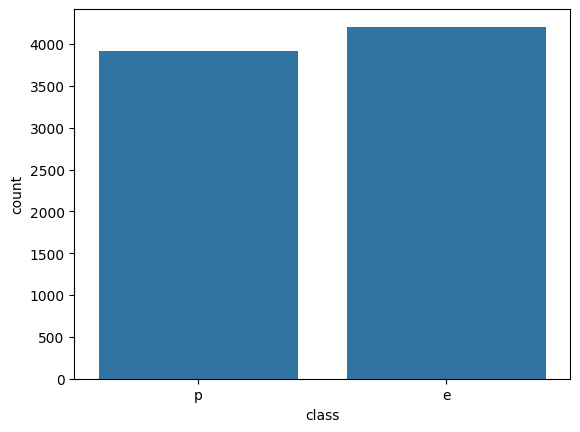

In [12]:
sns.countplot(data=df, x= "class")

In [13]:
df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

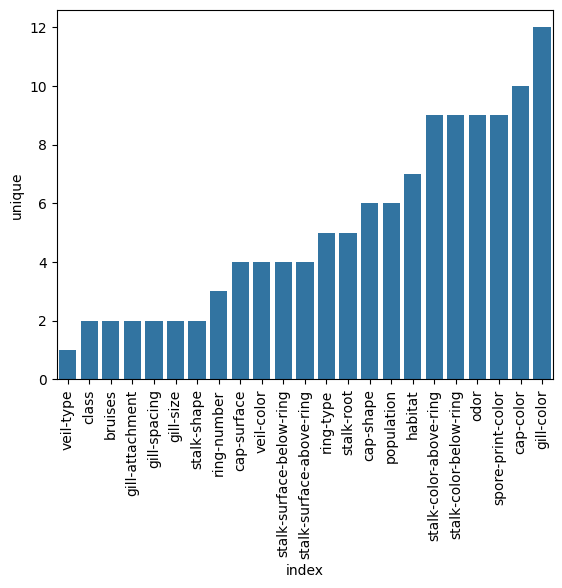

In [16]:
# Kaç tane unique satır var onları görüyoruz
# Belki bir zaman işimie yarar diye bu ve bunun üstündeki kodu koy bir yerde dursun diye yazılı

sns.barplot(data=df.describe().transpose().reset_index().sort_values("unique"), x="index", y="unique")

plt.xticks(rotation = 90);

In [17]:
X = df.drop("class", axis = 1)
y = df["class"]

In [18]:
X = pd.get_dummies(X, drop_first= True)

In [19]:
X.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

### **Ada Model**

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
model = AdaBoostClassifier(n_estimators=3)
model.fit(X_train, y_train)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=3)

In [26]:
mantar_pred = model.predict(X_test)

### Değerlendirme

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

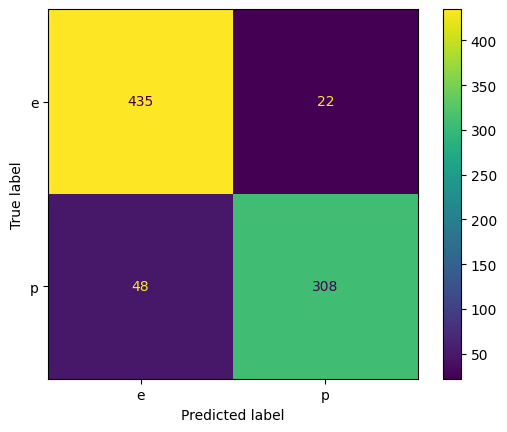

In [28]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [29]:
print(classification_report(mantar_pred, y_test))

              precision    recall  f1-score   support

           e       0.95      0.90      0.93       483
           p       0.87      0.93      0.90       330

    accuracy                           0.91       813
   macro avg       0.91      0.92      0.91       813
weighted avg       0.92      0.91      0.91       813



In [ ]:
# Öğrenmek için zayıf kalan veriler var (weak learner) AdaBoost burada bunları düzenleyebiliyor ha tabi daha fazla işlem gücü istiyor RandomForest varians üzerine ağırlık verir onu çözer Adaboost biası 

##### **Modelimizi İyileştirmeye Çalışalım**

In [31]:
hata_orani = []

for mantar_est in range(1, 30):
    model = AdaBoostClassifier(n_estimators= mantar_est)
    model.fit(X_train, y_train)

    mantar_deneme_pred = model.predict(X_test)

    hata = 1 - accuracy_score(y_test, mantar_deneme_pred)
    hata_orani.append(hata)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

In [32]:
# Eğer verimiz çok fazla ve tahmin etmek istediğimiz şeylerin ortalama olarak sayıları birbirlerine yakınsa yani verimizin küçük bir kısmını almak bizi okadar etkilemeyecekse ufak bir örneklem grubu alıp onun üstünde de modelimizi uygulayarak bize takribi bir sonuç vermesini sağlayabiliriz

df_sample = df.sample(frac=0.05, random_state=9)
# %5 lik bir kısmı rastgele olarak alabiliyoruz
df_sample.info()
# Burası ayrı bir kısım devam edelim önceki kodumuzun mantığından

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 4818 to 1674
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     406 non-null    object
 1   cap-shape                 406 non-null    object
 2   cap-surface               406 non-null    object
 3   cap-color                 406 non-null    object
 4   bruises                   406 non-null    object
 5   odor                      406 non-null    object
 6   gill-attachment           406 non-null    object
 7   gill-spacing              406 non-null    object
 8   gill-size                 406 non-null    object
 9   gill-color                406 non-null    object
 10  stalk-shape               406 non-null    object
 11  stalk-root                406 non-null    object
 12  stalk-surface-above-ring  406 non-null    object
 13  stalk-surface-below-ring  406 non-null    object
 14  stalk-color-above-ring    4

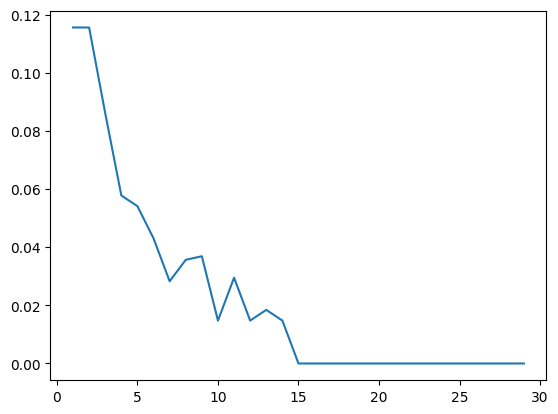

In [33]:
plt.plot(range(1,30), hata_orani)

In [34]:
model.feature_importances_
# Adaboost verimizin çok büyük bir kısmını 0 ladı

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.        , 0.        , 0.06896552, 0.03448276, 0.        ,
       0.        , 0.        , 0.06896552, 0.10344828, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06896552, 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06896552, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.        , 0.        , 0.     

In [36]:
feature_df = pd.DataFrame(index= X.columns , columns = ["Katsayi"], 
data=model.feature_importances_)

In [37]:
feature_df

,Katsayi
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [39]:
feature_df = feature_df[feature_df["Katsayi"]>0]
feature_df = feature_df.sort_values("Katsayi")

In [40]:
feature_df

,Katsayi
odor_c,0.034483
ring-type_p,0.034483
ring-number_t,0.034483
stalk-surface-above-ring_k,0.034483
stalk-surface-below-ring_y,0.034483
odor_p,0.034483
odor_f,0.034483
habitat_w,0.034483
stalk-shape_t,0.068966
population_v,0.068966


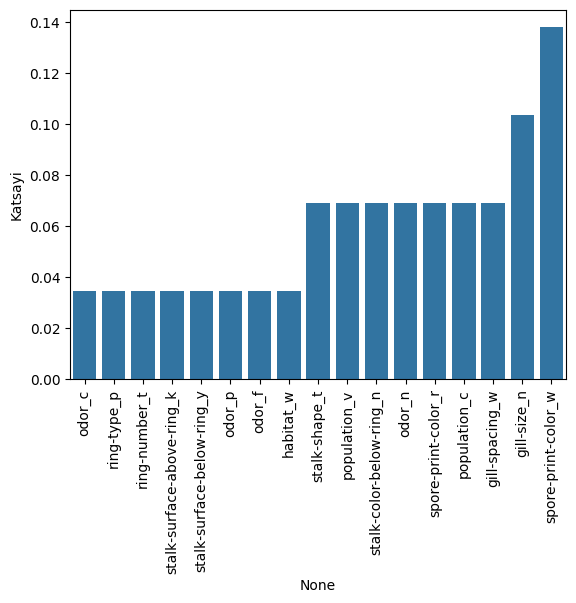

In [44]:
sns.barplot(x = feature_df.index, y = "Katsayi",data= feature_df)
plt.xticks(rotation = 90);